# Lab 4

This lab covers the lectures from the fourth week of class - 9, 10, and 11:
- Transformations/PCA
- Support Vector Machines (SVM)
- Statistical Evaluation

### Learning Objectives
- Apply PCA to the PBMC dataset to see how it can be helpful in speeding up k-NN and t-SNE visualizations
- Articulate differences between PCA and t-SNE dimensionality reduction
- Visually and mathematically explore the kernel trick using polynomial and RBF kernels
- Use cross-validation and statistical evaluations to compare SVM kernels on a real-world dataset
- Evaluate and quantitatively compare models on a classification task of your choice

### Submission And Assignment Instructions
Submit your `Lab4_lastname_firstname.pdf` file on canvas with your answers clearly marked (✅) and code commented. Skeleton code and/or comments are provided throughout to help you. Follow the posted instructions to download your lab as a well-formatted .pdf.

Formatting Notes:
- ❓Questions you must answer or tasks are marked with a "❓"
- ✅ Answers you should give are marked with "✅ Answer:"
- *Helpful hints are usually given in italics*
- Code you need to write is marked with `##❓YOUR CODE HERE`

**Please don't erase ANY of these markings!** They're to help the TAs find your answers and code as much as they're to help you find the questions.

## Section 1: PCA Transformations

### 1.1: Load the data

Run the code block below to load the dataset and get started.

In [1]:
# load packages and the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# load local file "data_03_pbmcs.txt"
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# load the pbmc data as a pandas df
pbmc = pd.read_csv("data_03_pbmc.txt", header=0, sep = "\t", quotechar = '"', quoting = 0)

# transpose to flip cells (observations) into rows
pbmc = pbmc.transpose()

# Load the celltype labels as a pd df
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

pbmc_idents = pd.read_csv("data_04_pbmcidents.txt", header=0, sep = "\t", quotechar = '"', quoting = 0)

Saving data_03_pbmc.txt to data_03_pbmc.txt
User uploaded file "data_03_pbmc.txt" with length 16414799 bytes


Saving data_04_pbmcidents.txt to data_04_pbmcidents.txt
User uploaded file "data_04_pbmcidents.txt" with length 81473 bytes


### 1.2: Centering and Scaling the Data & Initial PCA Visualizations

❓1.2.1 Why is it important to mean-center data (adjust the mean to 0) before doing PCA?

✅ Answer:

❓1.2.2 Why is it important to scale the data to have a standard deviation of 1 across features before doing PCA?

✅ Answer:

❓1.2.3 Write code below to standardize and scale the data, then apply PCA to find the first 50 principal components. Visualize the whole PBMC dataset in the plane of the first two principal components, coloring by the cell identities.
- Make sure to label the axes, including the proportion of variance explained by that principal component. (Have a look at `pca.explained_variance_ratio_`)
- Adjust `alpha` to avoid overplotting
- For compatibility with TA code further along in the assignment, call your scaled PBMC data `X_scaled`

Explained variance ratio: [0.02540579 0.01441399 0.01025347 0.00736164 0.00520757 0.00369867
 0.00350013 0.00312259 0.00273568 0.0026376  0.00230145 0.00214701
 0.00204877 0.00188566 0.00181668 0.00177609 0.00173743 0.00170953
 0.00167924 0.00166861 0.00163668 0.00162878 0.00161344 0.00161081
 0.00158809 0.00158386 0.00156401 0.00156334 0.00155125 0.00154761
 0.00154175 0.00154043 0.00152905 0.00152153 0.00150332 0.00150068
 0.00149339 0.00148312 0.00147616 0.00147183 0.00146787 0.00145733
 0.00145261 0.00144973 0.00144325 0.00143687 0.00142674 0.0014231
 0.00141988 0.00141477]
Explained variance by first 2 components: 0.0254, 0.0144


<ipython-input-2-95e0e3aa63ed>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(principal_components[:, 0], principal_components[:, 1], s=10, cmap="Spectral", alpha=0.6)


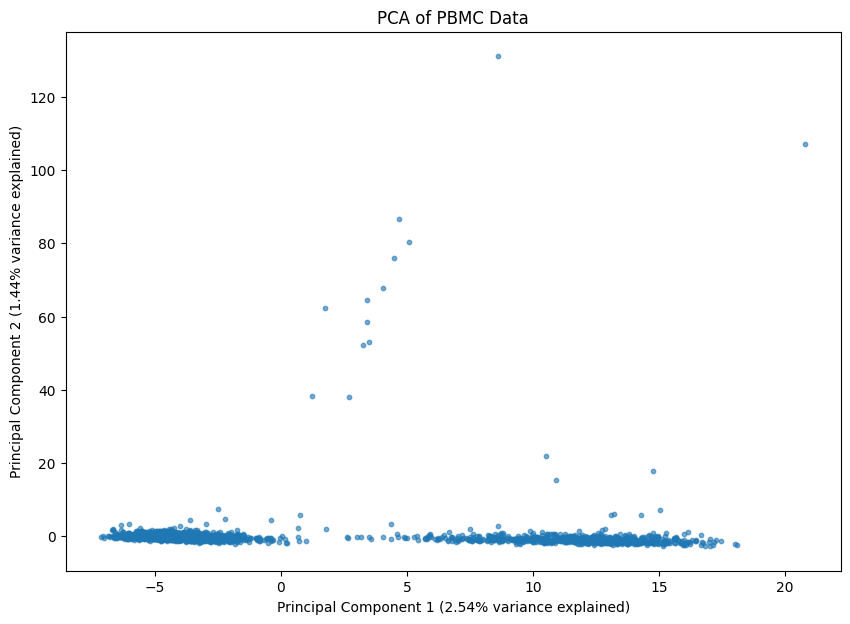

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##❓YOUR CODE HERE
# scale the data
scaler = StandardScaler()
scaled_pbmc = scaler.fit_transform(pbmc)

# apply PCA
pca_result = PCA(n_components=50)  # Get the first two principal components
principal_components = pca_result.fit_transform(scaled_pbmc)

# Get the explained variance ratio
explained_variance = pca_result.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")
print(f"Explained variance by first 2 components: {explained_variance[0]:.4f}, {explained_variance[1]:.4f}")

# Visualize the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], s=10, cmap="Spectral", alpha=0.6)
plt.xlabel(f"Principal Component 1 ({explained_variance[0]*100:.2f}% variance explained)")
plt.ylabel(f"Principal Component 2 ({explained_variance[1]*100:.2f}% variance explained)")
plt.title('PCA of PBMC Data')
plt.show()

❓1.2.4 Modify the code below as necessary to make a pairwise plot (use `sns.pairplot`) of the first 4 principal components. *This should take minimal modification, just substituting some of your variable names.*
- continue to label the percentage of variation explained in your axis labels

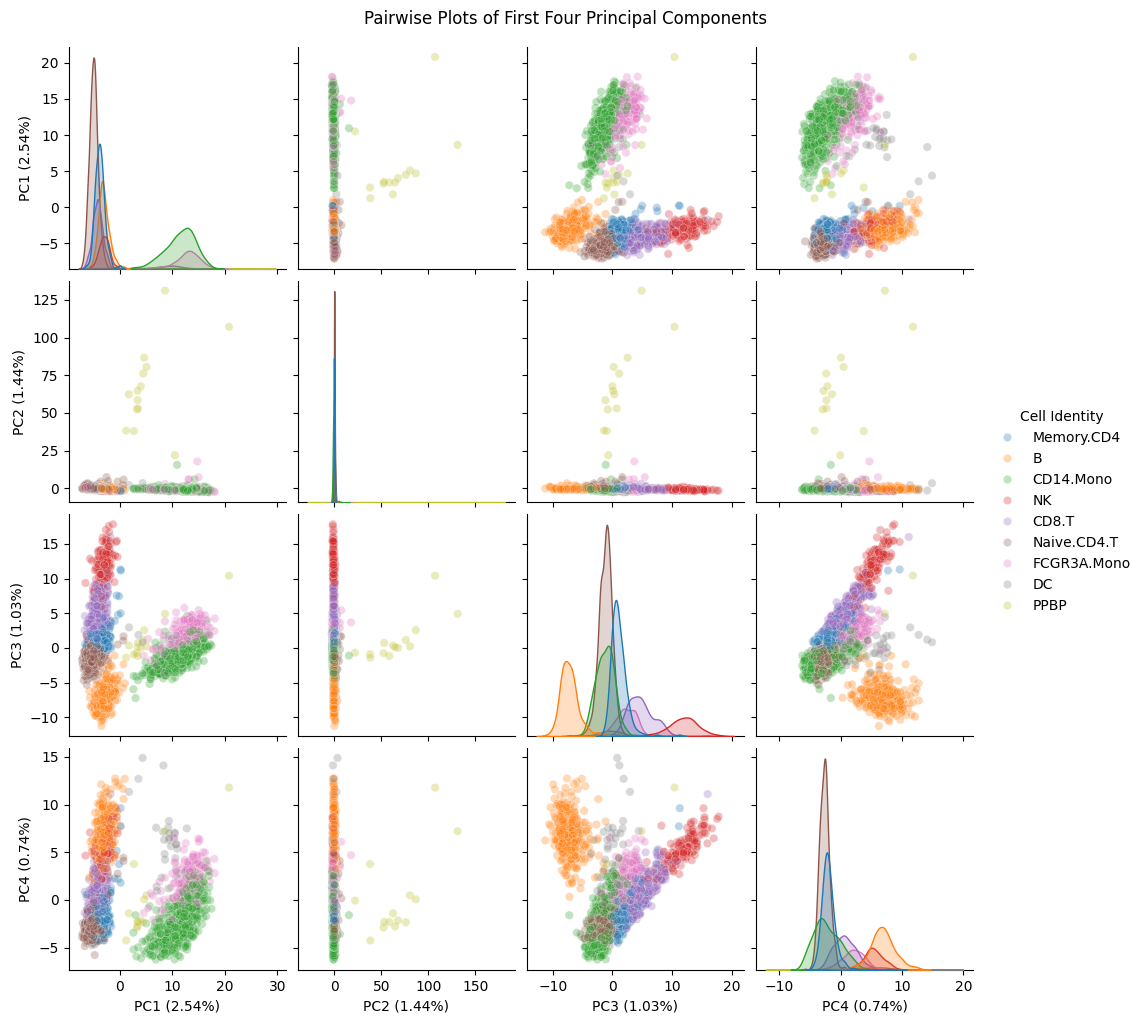

In [3]:
##❓YOUR CODE HERE
# modify as necessary to match your variable names from above to generate the pairplot

# Create a DataFrame with the first five principal components and the labels
pca_df = pd.DataFrame(data=principal_components[:, :4], columns=[f'PC{i+1}' for i in range(4)])
pca_df['Label'] = pbmc_idents.iloc[:, 0].values

# Create the pairplot with seaborn and adjust alpha for plotting
g = sns.pairplot(pca_df, hue='Label',
                 plot_kws={'alpha': 0.3})

# Generate axis labels using the percentage of variation explained
# modify to get the correct explained_variance
axis_labels = [f'PC{i+1} ({explained_variance[i]*100:.2f}%)' for i in range(4)]

# Add labels to the axes using a for loop
for i, label in enumerate(axis_labels):
    for j in range(4):
        if i == 3:
            g.axes[i, j].set_xlabel(axis_labels[j])
        if j == 0:
            g.axes[i, j].set_ylabel(axis_labels[i])
# title the plot and legend
g._legend.set_title('Cell Identity')
plt.suptitle('Pairwise Plots of First Four Principal Components', y =1.02)
plt.show()

### 1.3: Explained Variance

❓1.3.1 Plot the explained variance from the first 1000 principal components. This is often called an "Elbow Plot" to help data scientists look for the turn or "elbow" on the plot where the explained variance drops off.  *Hint: You'll need to redo the PCA with more principal components.*

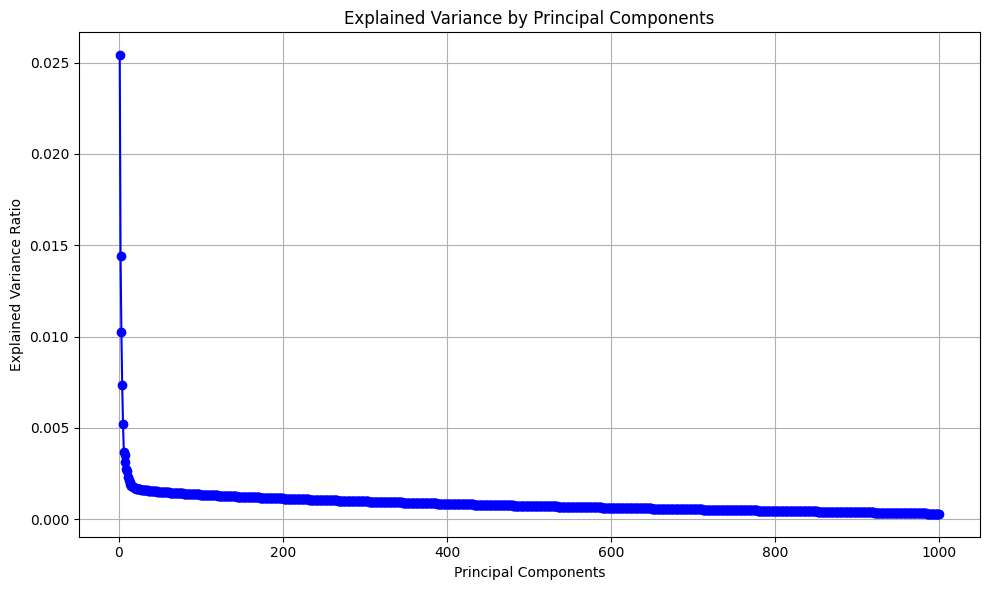

In [4]:
##❓YOUR CODE HERE

# apply PCA
pca = PCA(n_components=1000)
scaled_pca = pca.fit_transform(scaled_pbmc)

# Get the explained variance ration
explained_variance = pca.explained_variance_ratio_

# Create the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 1001), explained_variance, marker='o', linestyle='-', color='b')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# see if variance adds up to 100
print(f"Total explained variance: {np.sum(explained_variance) * 100:.2f}%")


Total explained variance: 86.59%


❓1.3.2 Briefly interpret what you see on your elbow plot. How many principal components are important to keep in this dataset? Does adding more principal components continue to add more variation to the dataset?

✅ Answer:

Another way to visualize explained variance is using cumulative explained variance. Run the code block below to see how much variance the first 100 principal components explain in total. *This code assumes your scaled data is called `X_scaled`.*

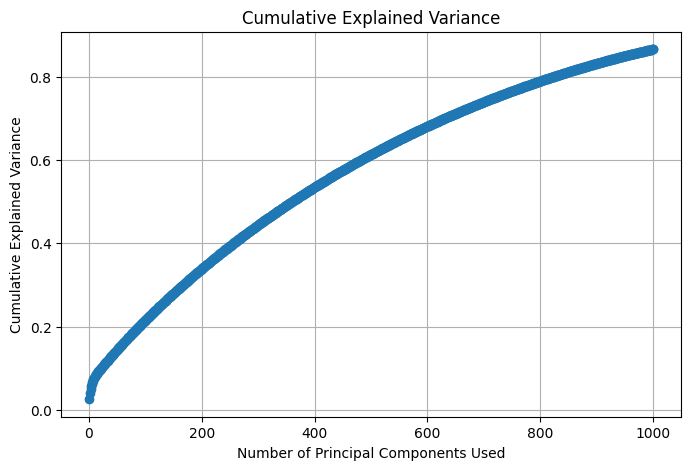

In [6]:
# apply PCA
pca = PCA(n_components=1000)
pca_result = pca.fit_transform(scaled_pbmc)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Create the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')

plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components Used')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

### 1.4 Applying t-SNE after PCA

Now we're going to explore the effects of PCA transformations on our t-SNE visualizations.

❓1.4.1 Apply t-SNE to the data and plot, still coloring by the cell identities. Do this and plot for four cases (the first is done for you):
1. ALL the data (no PCA, all 2000 genes)
2. The first 50 principal components (a somewhat arbitrary number)
3. The first 800 principal components (~80% of the variation in the data).
4. ALL the principal components (2000 dimensions)

To help you out, the first code block provides a function to compute and plot the t-SNE result from a dataframe, and the first plot (on all the data, just like last week) is provided.

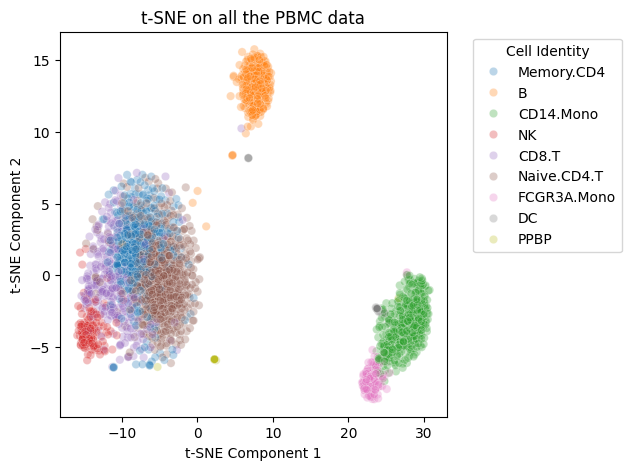

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=12)

def plot_my_tsne(data, plot_title):
  tsne_result = tsne.fit_transform(data)
  # Visualize the t-SNE result
  plt.figure(figsize=(5, 5))
  sns.scatterplot(
      x=tsne_result[:, 0], y=tsne_result[:, 1],
      hue=pbmc_idents.iloc[:, 0],
      alpha=0.3
  )
  plt.title(plot_title)
  plt.xlabel('t-SNE Component 1')
  plt.ylabel('t-SNE Component 2')
  plt.legend(title='Cell Identity', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()

# tSNE on all the data
plot_my_tsne(pbmc, "t-SNE on all the PBMC data")

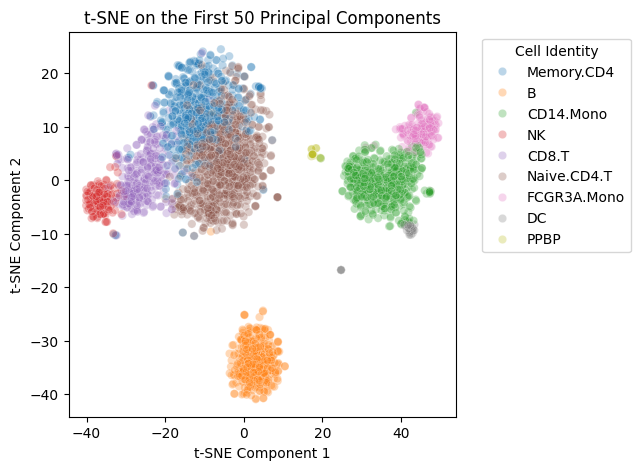

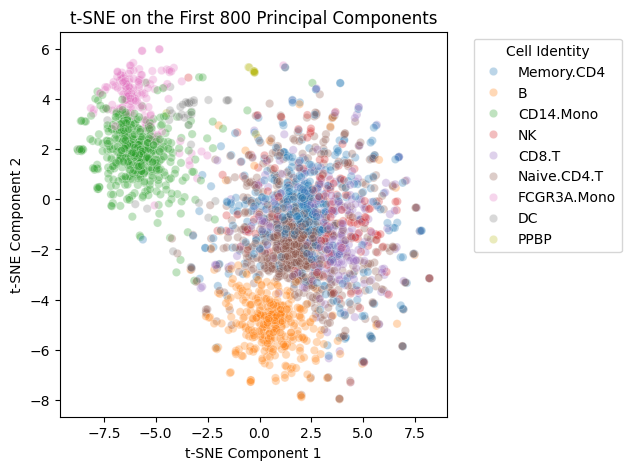

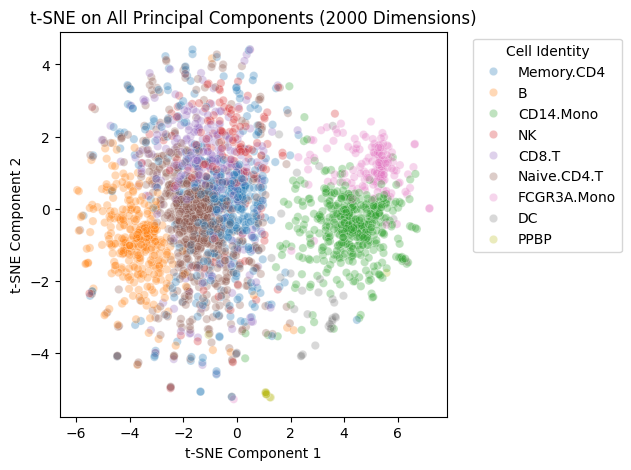

In [8]:
##❓YOUR CODE HERE
# PCA and t-SNE on the first 50 principal components
pca_50 = PCA(n_components=50).fit_transform(scaled_pbmc)
plot_my_tsne(pca_50, "t-SNE on the First 50 Principal Components")
# PCA AND t-SNE on the first 800 principal components
pca_800 = PCA(n_components=800).fit_transform(scaled_pbmc)
plot_my_tsne(pca_800, "t-SNE on the First 800 Principal Components")
# PCA and t-SNE on ALL the principal components
pca_all = PCA(n_components=2000).fit_transform(scaled_pbmc)
plot_my_tsne(pca_all, "t-SNE on All Principal Components (2000 Dimensions)")

❓1.4.2 Briefly compare these plots! While t-SNE is stochastic and may not be the same every time, you should notice more than time differences between the two. Which plot(s) are better at separating cell identities? Is this what you expected? Why or why not? *Remember the foreshadowing, it's important here. Also consider that PCA, even with all the dimensions, loses some information from the dataset that we started with. Run the t-SNE function on the scaled data if you'd like.*

✅ Answer:

### 1.5 Comparing t-SNE and PCA Using Synthetic Data

The codeblock generates some 50-dimensional synthetic data with 3 classes and makes two representations of the data:
- a plot of the data projected onto its first two principle components
- a 2-D t-SNE plot

Run the code below and inspect the resulting plots.

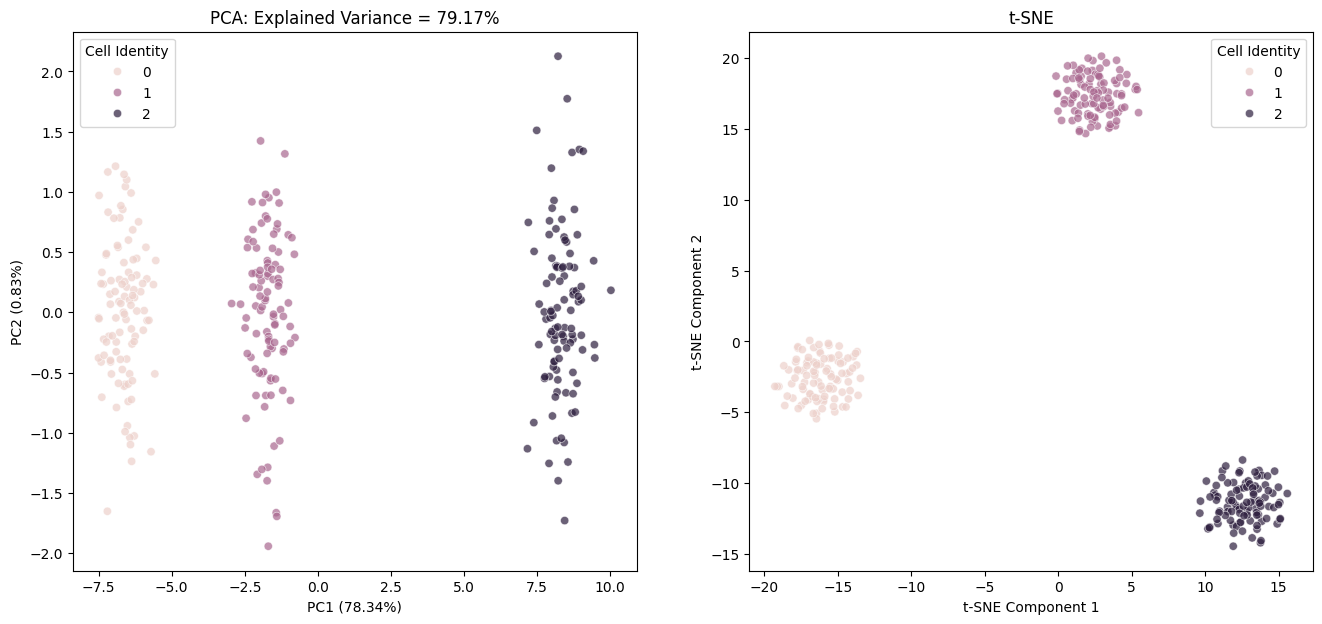

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 100
n_features = 50
n_classes = 3

# Centers of the clusters
centers = np.array([
    np.linspace(1, 1, n_features),
    np.linspace(4, 4, n_features),
    np.linspace(10, 10, n_features)
])

# Generate data points around the centers with noise
X = np.vstack([
    centers[i] + np.random.randn(n_samples, n_features) * 2
    for i in range(n_classes)
])

# Labels
y = np.hstack([
    np.full(n_samples, i)
    for i in range(n_classes)
])

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(n_features)])
df['Label'] = y

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

# Plot PCA result
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1],
    hue=df['Label'],
    alpha=0.7
)
plt.title(f'PCA: Explained Variance = {pca.explained_variance_ratio_.sum()*100:.2f}%')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.legend(title='Cell Identity', loc='best')

# Plot t-SNE result
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=tsne_result[:, 0], y=tsne_result[:, 1],
    hue=df['Label'],
    alpha=0.7
)
plt.title('t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cell Identity', loc='best')

plt.show()

❓1.5.1 Explain the resulting plots from the principles you understand about PCA and t-SNE. Considering how the data is generated in the code above (the ground truth of the three classes of data), which plot better preserves the global structure?

✅ Answer:

code for below questions

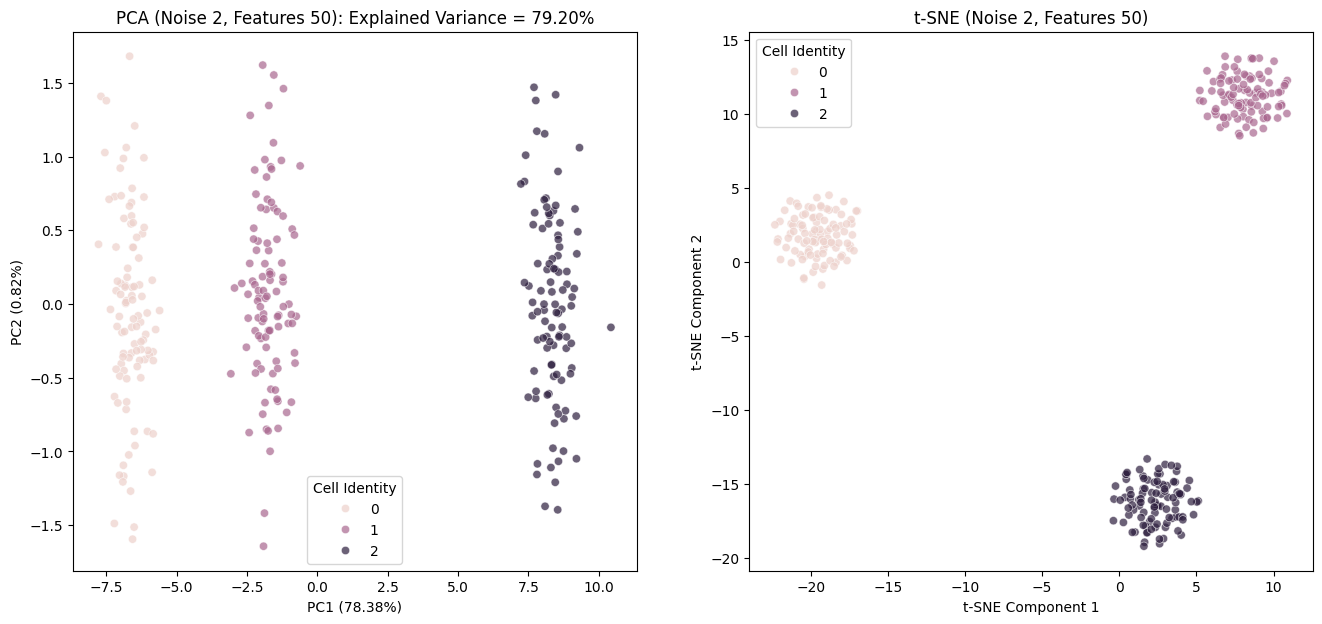

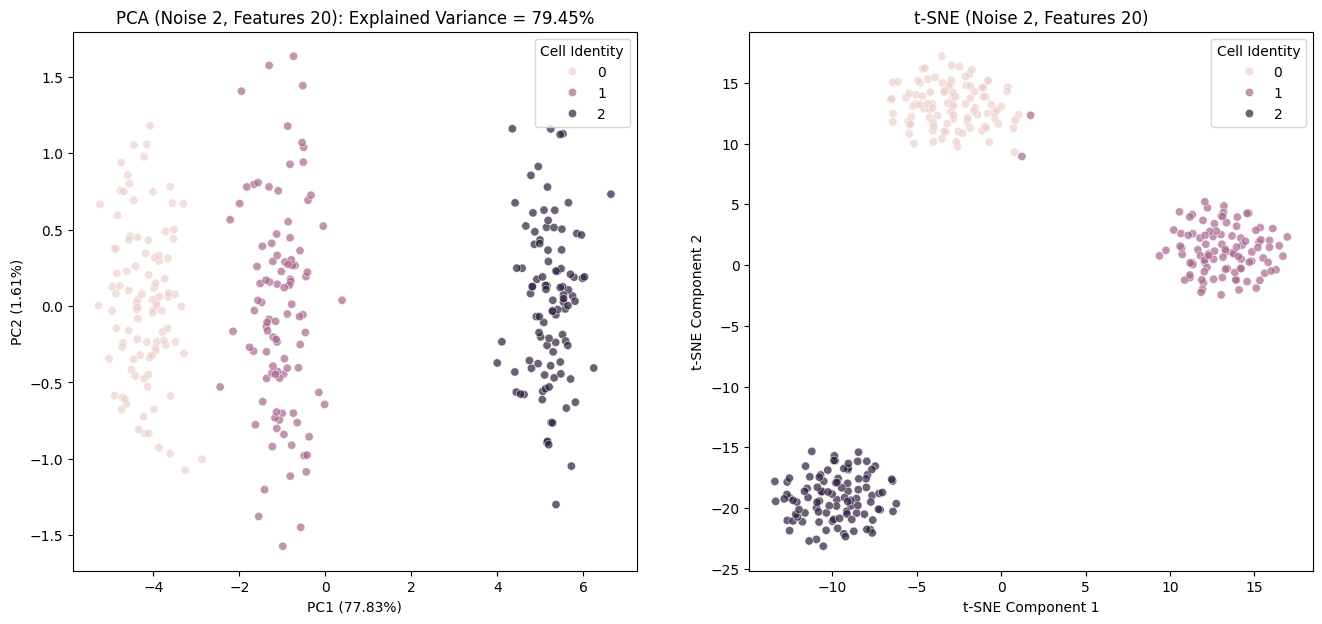

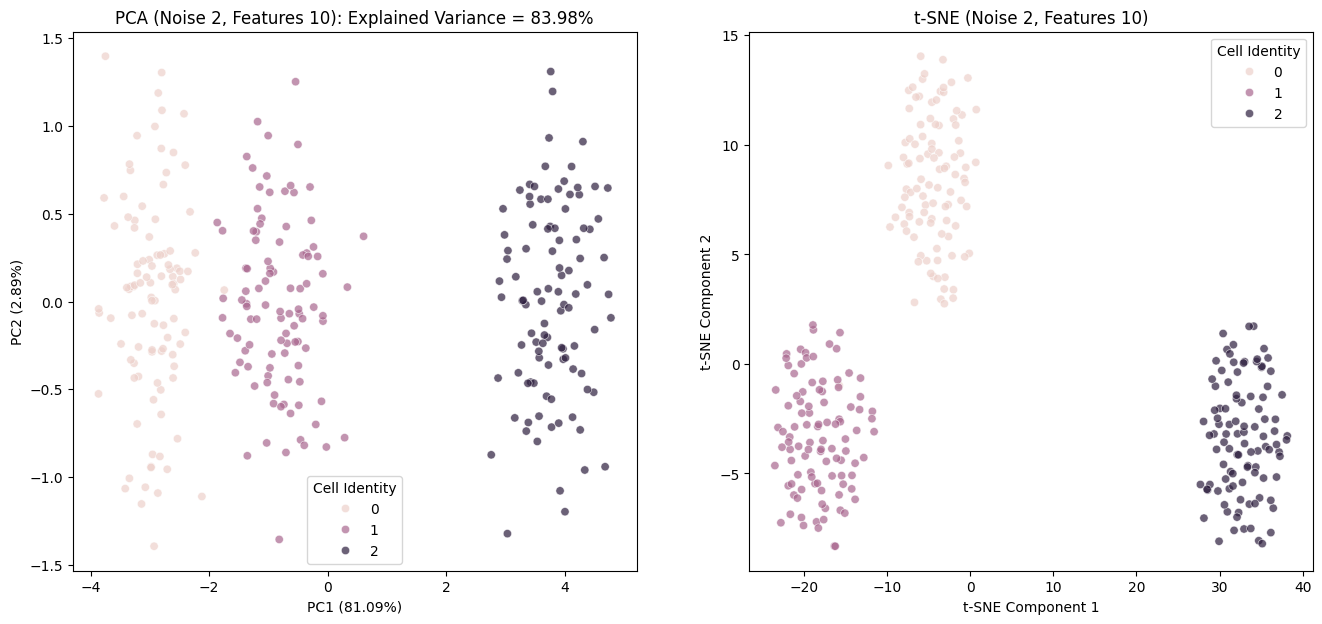

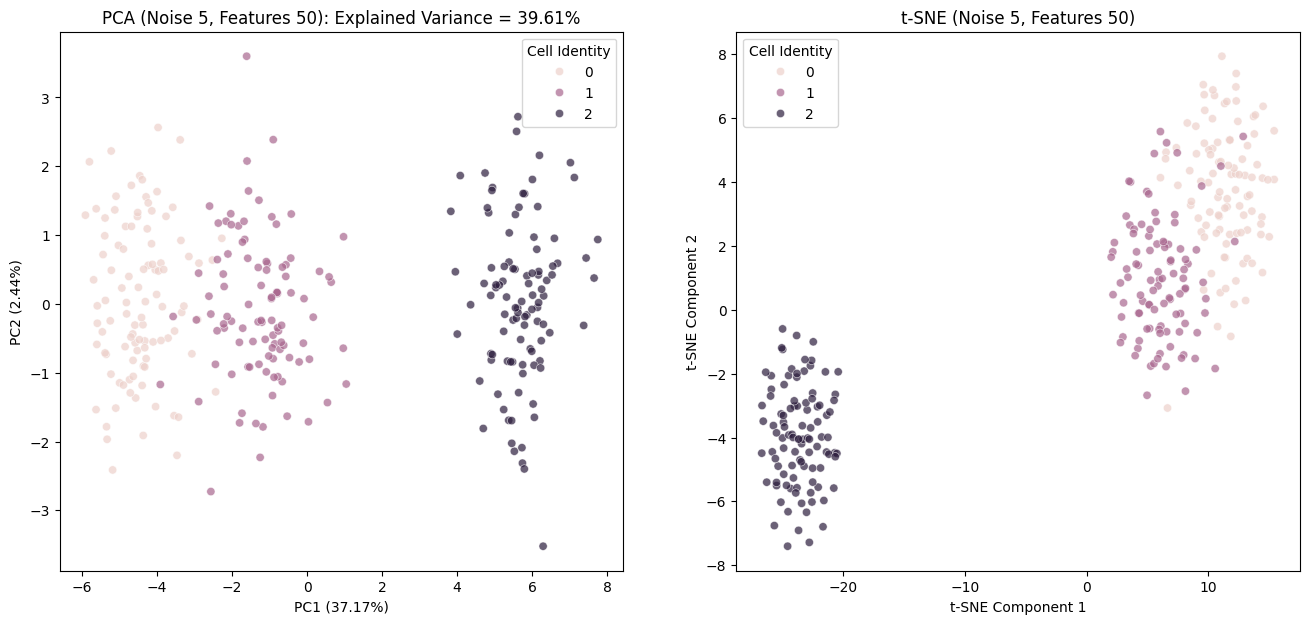

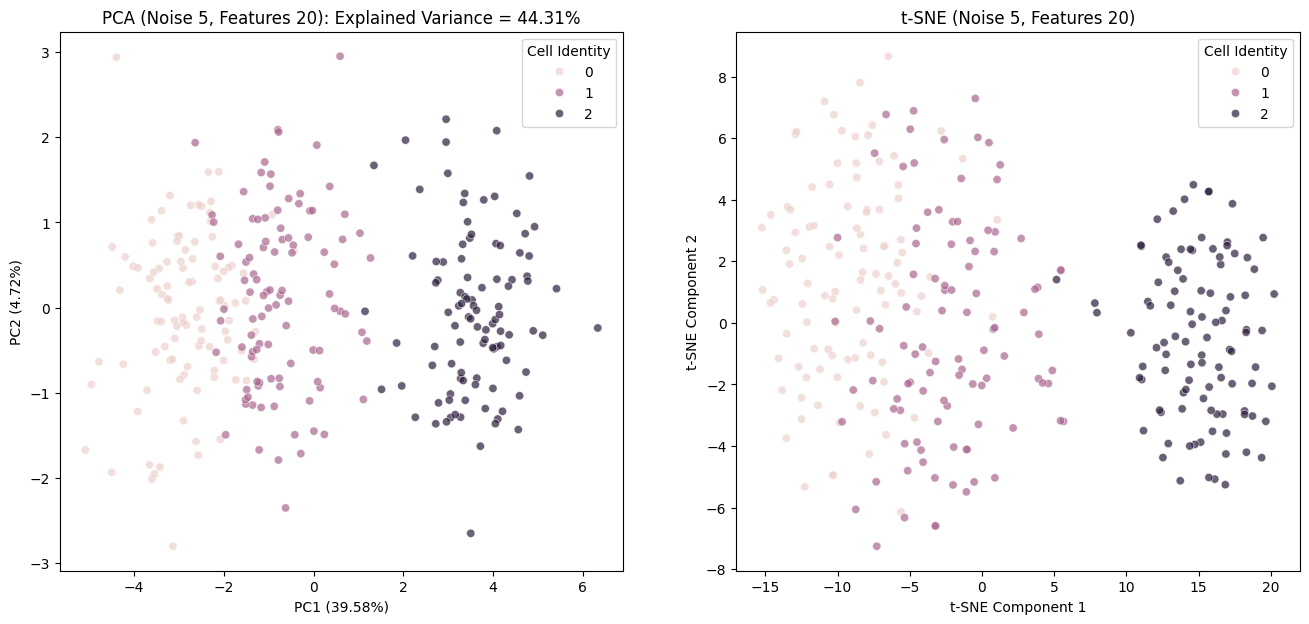

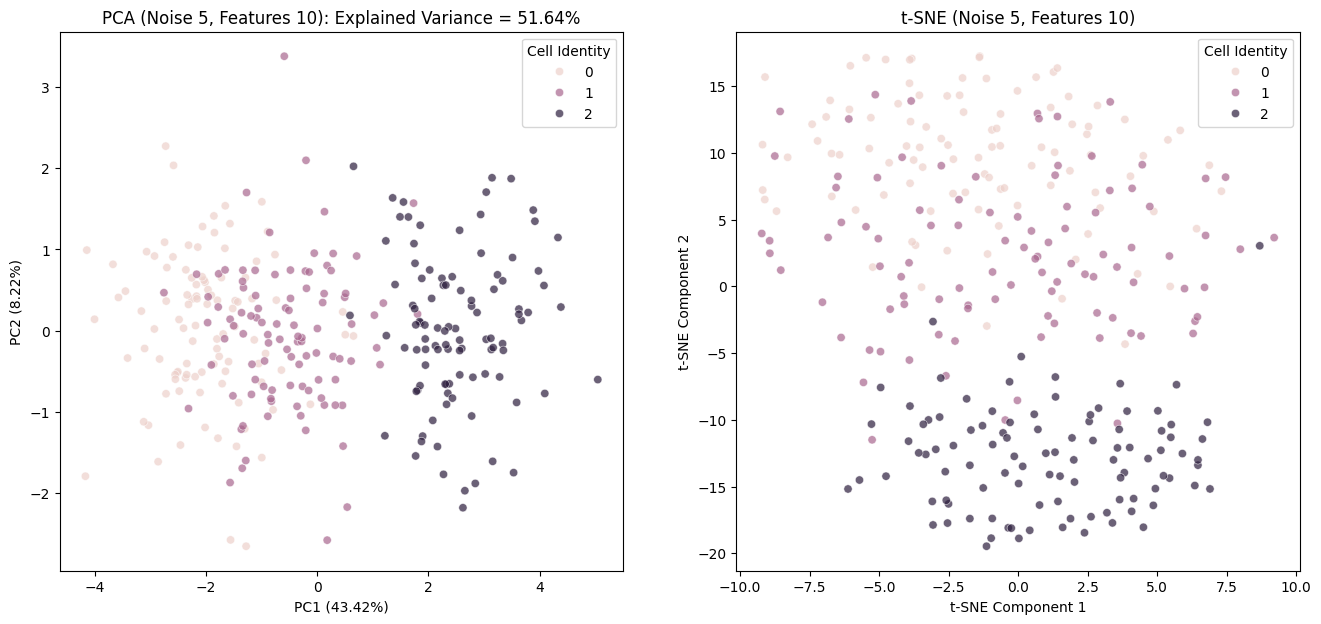

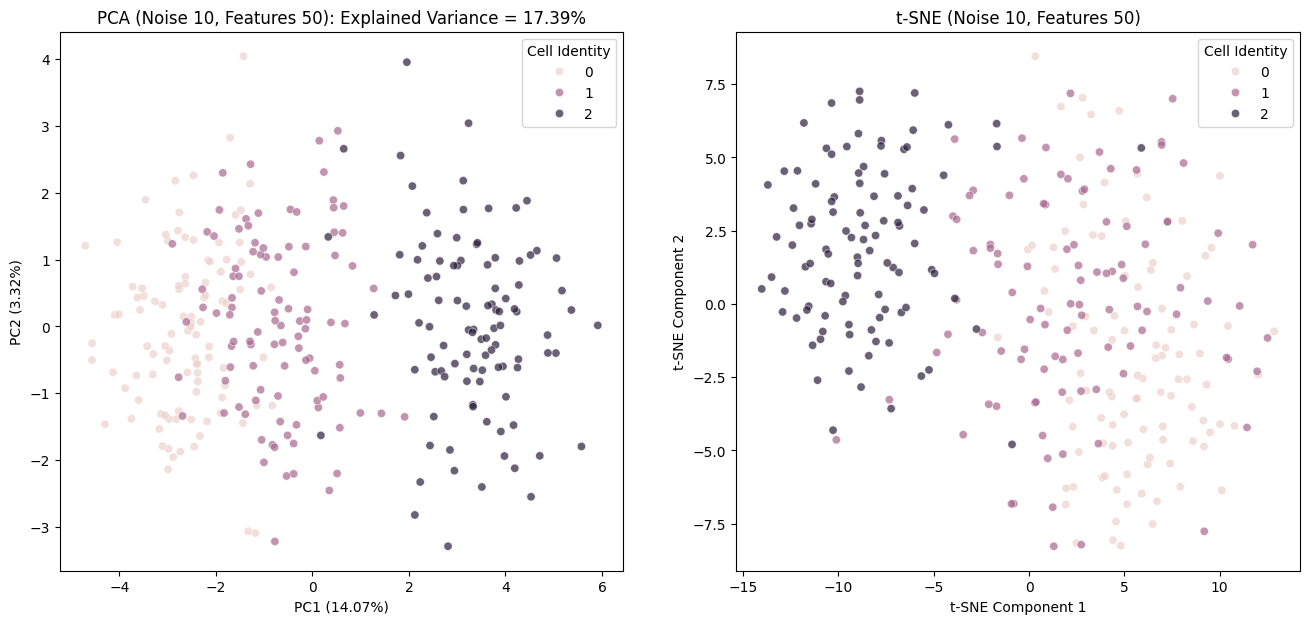

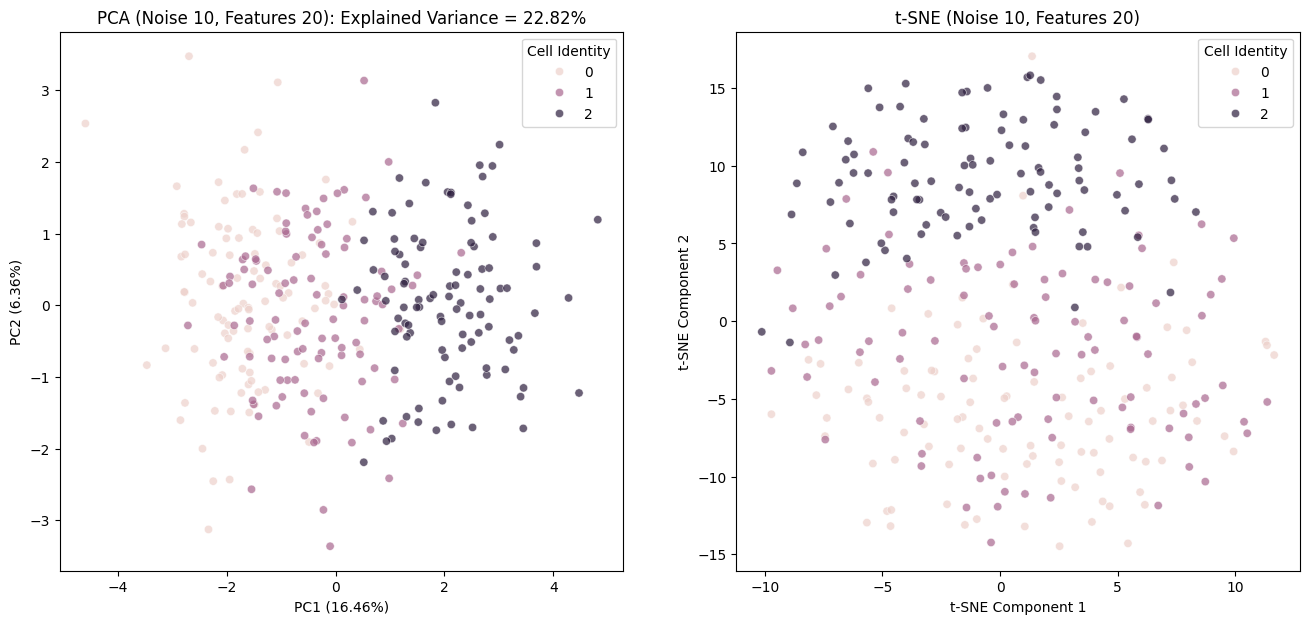

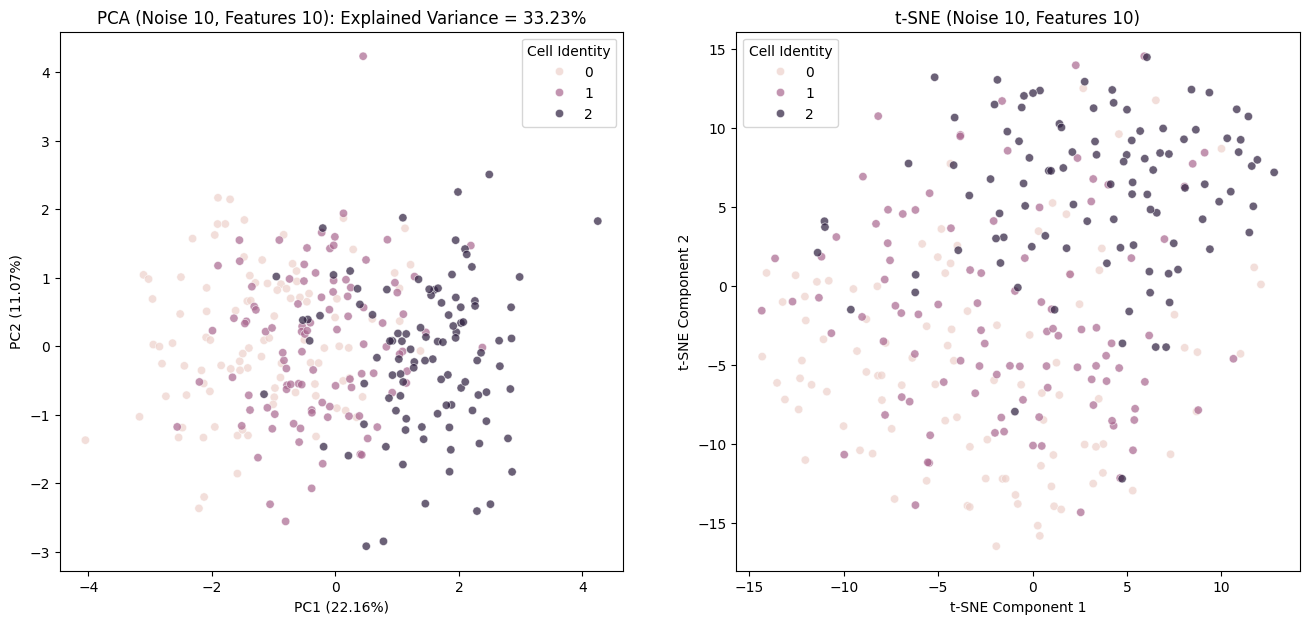

In [10]:
# List of different noise factors and dimensions
noise_factors=[2,5,10]
n_features_list=[50,20,10]

for noise_factor in noise_factors:
    for n_features in n_features_list:
        centers=np.array([
            np.linspace(1,1,n_features),
            np.linspace(4,4,n_features),
            np.linspace(10,10,n_features)
        ])
        X=np.vstack([
            centers[i]+np.random.randn(n_samples,n_features)*noise_factor
            for i in range(n_classes)
        ])
        y=np.hstack([np.full(n_samples,i) for i in range(n_classes)])
        df=pd.DataFrame(X,columns=[f'Feature_{i+1}' for i in range(n_features)])
        df['Label']=y
        X_scaled=scaler.fit_transform(X)

        pca=PCA(n_components=2)
        pca_result=pca.fit_transform(X_scaled)

        tsne=TSNE(n_components=2,random_state=42)
        tsne_result=tsne.fit_transform(X_scaled)

        plt.figure(figsize=(16,7))
        plt.subplot(1,2,1)
        sns.scatterplot(
            x=pca_result[:,0],y=pca_result[:,1],
            hue=df['Label'],alpha=0.7
        )
        plt.title(f'PCA (Noise {noise_factor}, Features {n_features}): Explained Variance = {pca.explained_variance_ratio_.sum()*100:.2f}%')
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
        plt.legend(title='Cell Identity',loc='best')

        plt.subplot(1,2,2)
        sns.scatterplot(
            x=tsne_result[:,0],y=tsne_result[:,1],
            hue=df['Label'],alpha=0.7
        )
        plt.title(f't-SNE (Noise {noise_factor}, Features {n_features})')
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.legend(title='Cell Identity',loc='best')

        plt.show()


❓1.5.2 Play around with the above code to generate the data. What effect does increasing the spread of the noise have? Does adding enough noise change how effective the methods are at preserving global structure? Why?



✅Answer:

❓1.5.3 What effect does reducing the number of dimensions have on the PCA plot? On the t-SNE plot? Does a small enough number of dimensions change which method is more effective at preserving ?

✅ Answer:

## Section 2: Exploring Kernels

We're going to work a small example explicitly to show the advantage of the kernel trick.

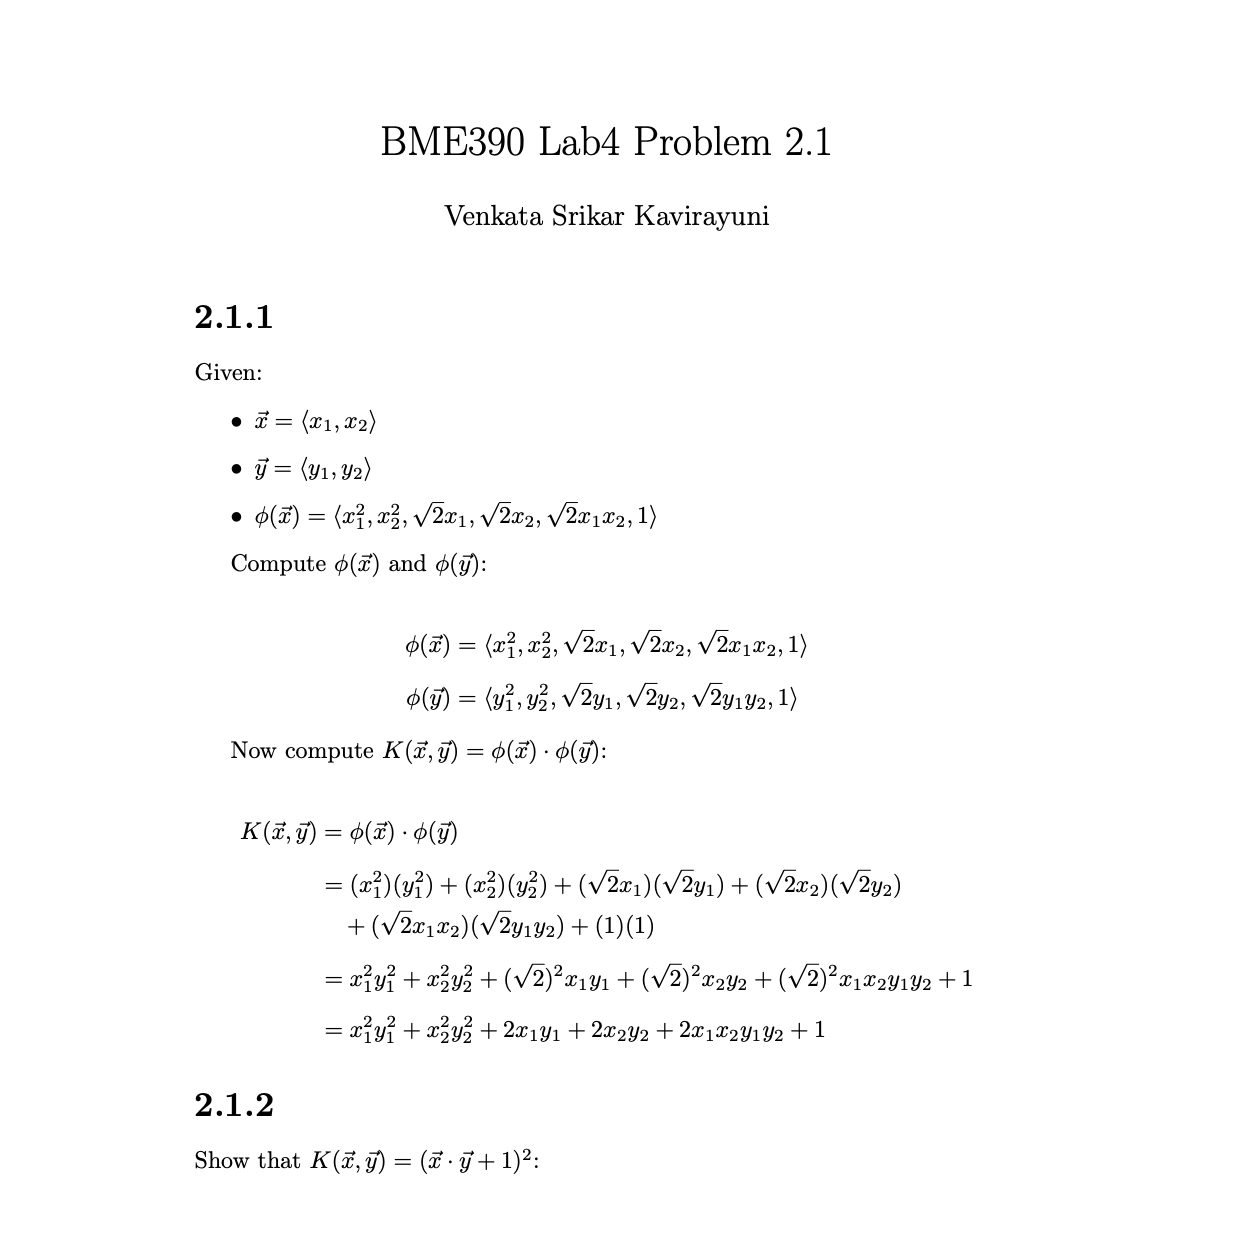

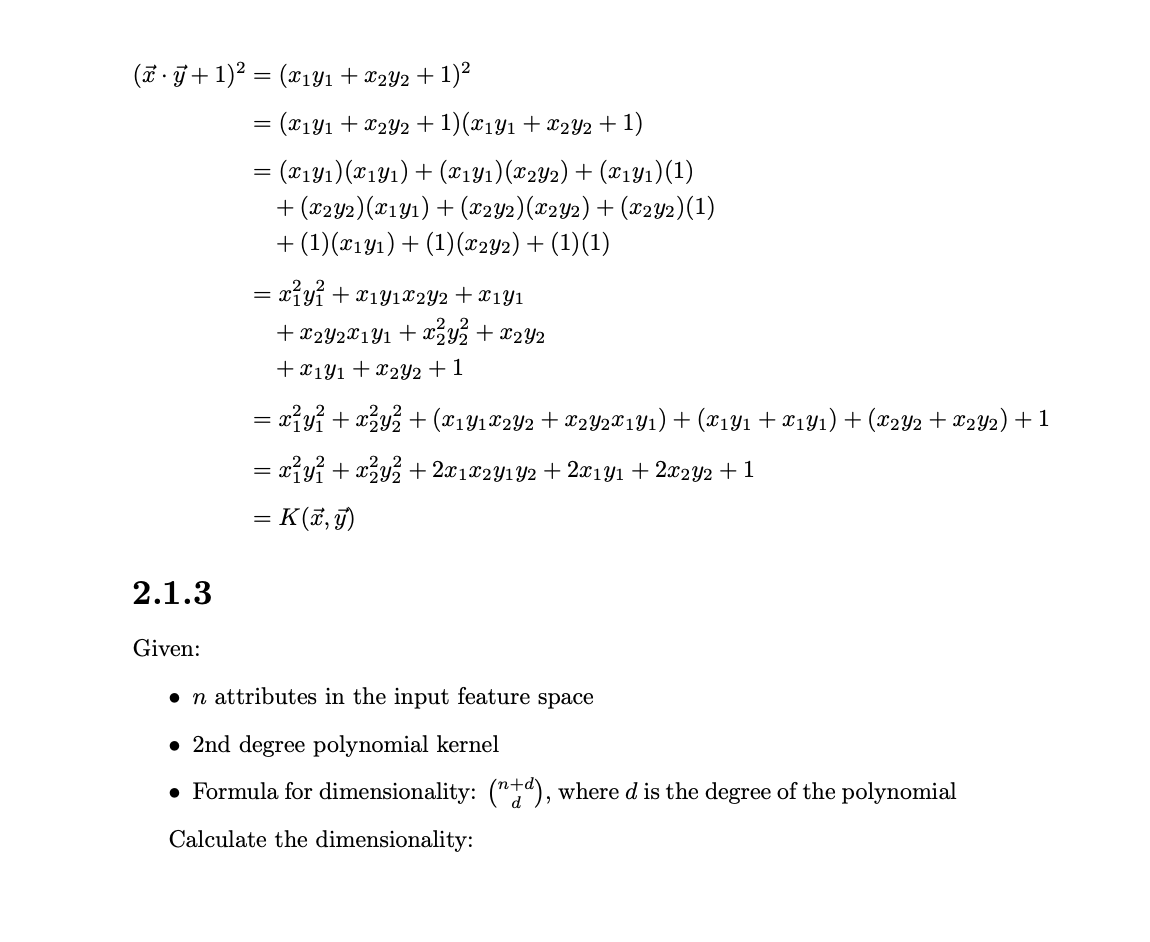

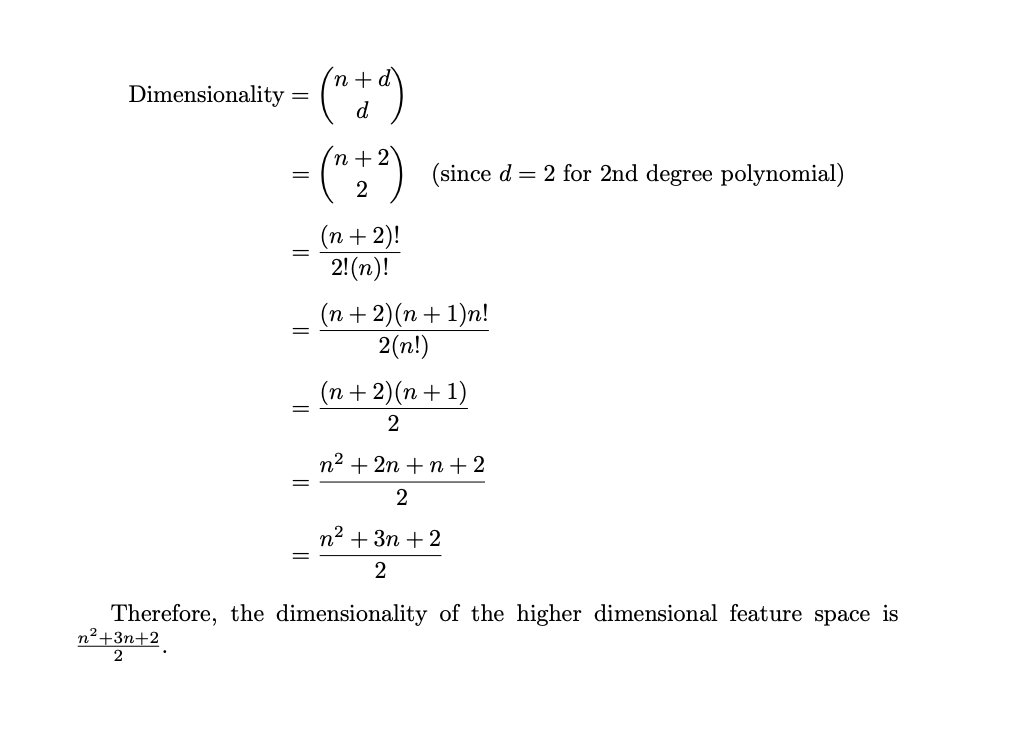

### 2.1: Polynomial Kernel Math

We have data points $\vec x = \langle x_1,x_2 \rangle$ and $\vec y = \langle y_1,y_2 \rangle$ that we'll represent as vectors in our 2-D input space.

❓2.1.1 Compute the projections $\vec x → \phi(\vec x)$ and $\vec y → \phi(\vec y)$ explicitly for $\phi(\vec x ) = \langle x_1^2, x_2^2, \sqrt{2} x_1, \sqrt{2} x_2, \sqrt{2} x_1x_2,1 \rangle$. Then compute the new inner product $K(\vec x, \vec y) = \phi(\vec x) \cdot \phi(\vec y)$ explicitly. *Your answer should be a polynomial in terms of $x_1, x_2, y_1,$ and $y_2$.*

✅ Answer:

❓2.1.2 Show that this dot product in high dimensional feature space is the same as $K(\vec x, \vec y) = (\vec x \cdot \vec y + 1)^2$ by expanding the right-hand side. This is what is usually called the polynomial kernel function with degree 2!

✅ Answer:

You can see that our 2-D input space ($\vec x \in \mathbb{R}^2$) mapped to a 6-D feature space ($\phi(\vec x) \in \mathbb{R}^6$). [It can be shown](https://en.wikipedia.org/wiki/Polynomial_kernel#Definition) that a polynomial kernel maps to ${n+d}\choose{d}$ dimensions.

❓ 2.1.3 If we start with $n$ attributes in the input feature space, using a 2nd degree polynomial kernel, what is the dimensionality of the higher dimensional feature space?

✅ Answer:

### 2.2: Visualizing Polynomial Kernels

Let's visualize the transformation we just explicitly computed.

❓2.2.1 The first part of the code below is outlined for you. Calculate and plot the kernel function for the given X and Y values (in a meshgrid).

> [This video](https://www.youtube.com/watch?v=OdlNM96sHio) also shows a visualization of the polynomial kernel.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import polynomial_kernel

# Define the range of x and y values
x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)

# Create a meshgrid of x and y values
X, Y = np.meshgrid(x, y)

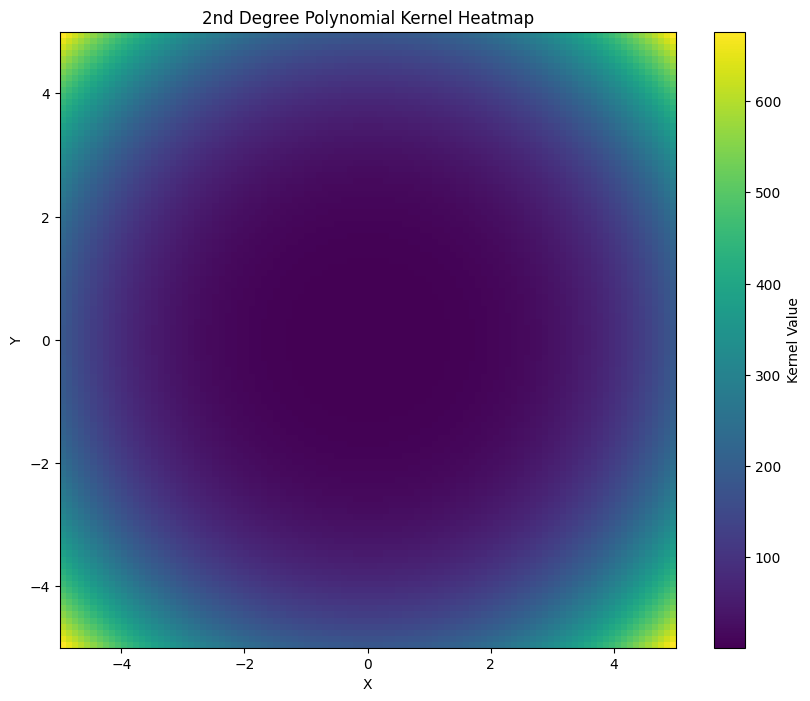

In [16]:
##❓YOUR CODE HERE
# Compute the polynomial kernel matrix for a 2nd degree
points = np.vstack([X.ravel(), Y.ravel()]).T
kernel_matrix = polynomial_kernel(points, points, degree=2)
kernel_values = np.diag(kernel_matrix).reshape(X.shape)

# Create a heatmap of the kernel matrix
plt.figure(figsize=(10, 8))
plt.imshow(kernel_values, extent=(-5,5,-5,5), origin='lower', cmap='viridis')
plt.colorbar(label='Kernel Value')
plt.title('2nd Degree Polynomial Kernel Heatmap')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Section 3: Support Vector Machines

We're going to try using SVM to improve our classification on a non-linear classification task.

❓3.1 Write code to run SVM on the PBMC data with a linear kernel, polynomial kernel, and RBF kernel, using 10-fold cross-validation on each. Visualize the accuracy and recall for each kernel, plotting error bars as SEM.

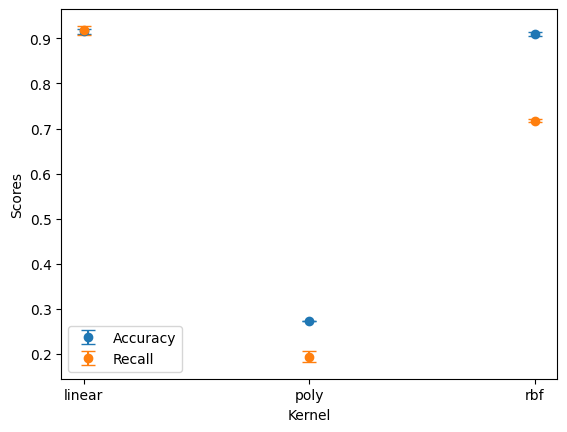

In [12]:
##❓YOUR CODE HERE

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, make_scorer
import numpy as np
import matplotlib.pyplot as plt

kernels=['linear','poly','rbf']
accuracy_scores=[]
recall_scores=[]
sem_accuracy=[]
sem_recall=[]

for kernel in kernels:
    svm=SVC(kernel=kernel)
    accuracy=cross_val_score(svm,scaled_pbmc,pbmc_idents.iloc[:,0],cv=10,scoring='accuracy')
    recall=cross_val_score(svm,scaled_pbmc,pbmc_idents.iloc[:,0],cv=10,scoring=make_scorer(recall_score,average='macro'))
    accuracy_scores.append(np.mean(accuracy))
    recall_scores.append(np.mean(recall))
    sem_accuracy.append(np.std(accuracy)/np.sqrt(len(accuracy)))
    sem_recall.append(np.std(recall)/np.sqrt(len(recall)))

x_pos=np.arange(len(kernels))

plt.errorbar(x_pos,accuracy_scores,yerr=sem_accuracy,fmt='o',label='Accuracy',capsize=5)
plt.errorbar(x_pos,recall_scores,yerr=sem_recall,fmt='o',label='Recall',capsize=5)
plt.xticks(x_pos,kernels)
plt.xlabel('Kernel')
plt.ylabel('Scores')
plt.legend()
plt.show()







❓3.2 Briefly interpret your results comparing these kernels. (one sentence).

✅Answer: